In [1]:

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



dataset1 = pd.read_csv('DL-1.csv')
X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [2]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [4]:
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(1,8)
        self.fc2=nn.Linear(8,8)
        self.fc3=nn.Linear(8,1)
        self.relu=nn.ReLU()
        self.history={'loss':[]}

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [5]:
ai_brain= NeuralNet()
criterion= nn.MSELoss()
optimizer = optim.RMSprop(ai_brain.parameters(),lr=0.001)

In [6]:
def train_model(ai_brain, X_train, y_train,criterion,optimizer,epochs=2000):
  for epoch in range(epochs):
    optimizer.zero_grad()
    loss = criterion(ai_brain(X_train),y_train)
    loss.backward()
    optimizer.step()

    ai_brain.history['loss'].append(loss.item())
    if epoch % 200==0:
      print(f'Epoch [{epoch}/{epochs}],Loss:{loss.item():.6f}')


In [7]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [0/2000],Loss:1208.993164
Epoch [200/2000],Loss:790.464722
Epoch [400/2000],Loss:335.704620
Epoch [600/2000],Loss:166.457260
Epoch [800/2000],Loss:139.192337
Epoch [1000/2000],Loss:104.653183
Epoch [1200/2000],Loss:65.379417
Epoch [1400/2000],Loss:29.355295
Epoch [1600/2000],Loss:5.656611
Epoch [1800/2000],Loss:0.077646


In [8]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 0.146556


In [9]:
loss_df = pd.DataFrame(ai_brain.history)

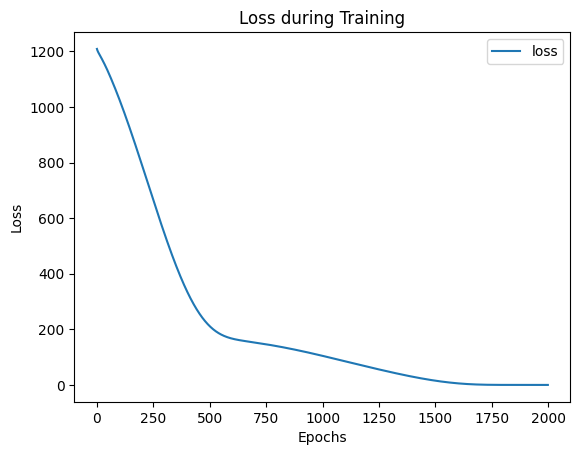

In [10]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [11]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 27.997798919677734
